# ベストなANDゲートの構築

全てインポートします：

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # 画像をきれいに見せるため
from qiskit.providers.aer import noise
import numpy as np

問題セット1では、量子ゲートを使用してANDゲートを作成しました。 今回も同じことを行いますが、本物のデバイスを対象にします。 本物のデバイスを使用する際には、主に2つの制約があります。 1つは接続性で、もう1つはノイズです。

接続性により、直接実行できる`cx` ゲートがわかります。 たとえば、デバイス`ibmq_5_tenerife` には、0から4までの番号が付けられた5つの量子ビットがあります。

In [2]:
coupling_map = [[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]]

ここで、`[1,0]` は、量子ビット1をコントロールとして量子ビット0をターゲットとして`cx`を実装できることを示し、`[2,0]`は、量子ビット2をコントロールとして0をターゲットとして持つことができることを示します。 これが、デバイスに直接実装できる`cx`ゲートです。

デバイスの「ノイズ」は、発生してはならないけれども発生してしまうもの、すべての影響の集合です。ノイズが発生すると、出力が必ずしも期待どおりの結果になるとは限りません。量子回路のすべてのプロセス（初期状態の準備、ゲートの適用、出力の測定）に関連してノイズが発生します。ゲートのノイズは、ゲートの種類や量子ビットの違いによって異なる可能性があります。`cx`ゲートは通常、単一の量子ビットゲートよりもノイズが多くなります。

ノイズモデルを使用してノイズをシミュレートすることもできます。 また、本物のデバイスのノイズ測定に基づいてノイズモデルを設定できます。 次のノイズモデルは、`ibmq_5_tenerife`に基づいたものです。

In [3]:
noise_dict = {'errors': [{'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0004721766167523067, 0.0004721766167523067, 0.0004721766167523067, 0.9985834701497431], 'gate_qubits': [[0]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0005151090708174488, 0.0005151090708174488, 0.0005151090708174488, 0.9984546727875476], 'gate_qubits': [[1]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0005151090708174488, 0.0005151090708174488, 0.0005151090708174488, 0.9984546727875476], 'gate_qubits': [[2]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.000901556048412383, 0.000901556048412383, 0.000901556048412383, 0.9972953318547628], 'gate_qubits': [[3]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0011592423249461303, 0.0011592423249461303, 0.0011592423249461303, 0.9965222730251616], 'gate_qubits': [[4]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0009443532335046134, 0.0009443532335046134, 0.0009443532335046134, 0.9971669402994862], 'gate_qubits': [[0]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0010302181416348977, 0.0010302181416348977, 0.0010302181416348977, 0.9969093455750953], 'gate_qubits': [[1]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0010302181416348977, 0.0010302181416348977, 0.0010302181416348977, 0.9969093455750953], 'gate_qubits': [[2]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.001803112096824766, 0.001803112096824766, 0.001803112096824766, 0.9945906637095256], 'gate_qubits': [[3]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0023184846498922607, 0.0023184846498922607, 0.0023184846498922607, 0.9930445460503232], 'gate_qubits': [[4]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.9672573379090872], 'gate_qubits': [[1, 0]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.9699888805021712], 'gate_qubits': [[2, 0]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.9627184072576159], 'gate_qubits': [[2, 1]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.9437457618579164], 'gate_qubits': [[3, 2]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.9339816349935997], 'gate_qubits': [[3, 4]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.9307167621063416], 'gate_qubits': [[4, 2]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9372499999999999, 0.06275000000000008], [0.06275000000000008, 0.9372499999999999]], 'gate_qubits': [[0]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9345, 0.0655], [0.0655, 0.9345]], 'gate_qubits': [[1]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.97075, 0.029249999999999998], [0.029249999999999998, 0.97075]], 'gate_qubits': [[2]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9742500000000001, 0.02574999999999994], [0.02574999999999994, 0.9742500000000001]], 'gate_qubits': [[3]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.8747499999999999, 0.12525000000000008], [0.12525000000000008, 0.8747499999999999]], 'gate_qubits': [[4]]}], 'x90_gates': []}
noise_model = noise.noise_model.NoiseModel.from_dict( noise_dict )

デバイス上で直接実行するには、IBMQアカウントが必要となり、プログラム内でIBMQアカウントにサインインする必要があります。今回は、IBMQアカウントにサインインする代わりに、上で定義された5量子ビットデバイスのシミュレーションを使用します。

In [4]:
qr = QuantumRegister(5, 'qr')
cr = ClassicalRegister(1, 'cr')
backend = Aer.get_backend('qasm_simulator')

ここで、`AND`関数を定義しますが、問題セット1での定義といくつか違いがあります。違いの一つは、5量子ビット回路で定義されているため、`input1`、`input2`、および出力のエンコードに5量子ビットのどれを使用するかを決定する必要があることです。 もう一つの違いは、この計算を10000回繰り返したときに、各出力が検出される回数のヒストグラムを出力にしていることです。

In [5]:
def AND (input1,input2, q_1=0,q_2=1,q_out=2):
    # q_1 が入力1の量子ビット
    # q_2 が入力2の量子ビット
    # q_out が出力
    
    qc = QuantumCircuit(qr, cr)
    
    # 量子ビットq1, q2を入力ビットとして準備
    if input1=='1':
        qc.x( qr[ q_1 ] )
    if input2=='1':
        qc.x( qr[ q_2 ] )
    
    qc.ccx(qr[ q_1 ],qr[ q_2 ],qr[ q_out ]) # ANDはcが必要です
    qc.measure(qr[ q_out ],cr[0]) # 量子ビット1からの出力を測定
    
    # 回路はシミュレーターで実行されますが、Tenerife のノイズと接続性も再現されるように実行されます 
    job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
    output = job.result().get_counts()
    
    return output

たとえば、両方の入力が`0`の場合の結果は次のとおりです。

{'1': 991, '0': 9009}


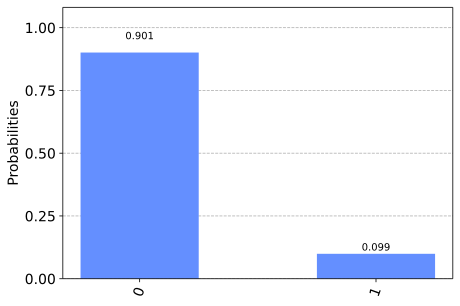

In [6]:
result = AND('0','0')
print( result )
plot_histogram( result )

すべての結果を比較して、最も信頼性の低いものを見つけます。



In [7]:
worst = 1
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('\nProbability of correct answer for inputs',input1,input2)
        prob = AND(input1,input2, q_1=0,q_2=1,q_out=2)[str(int( input1=='1' and input2=='1' ))]/10000
        print( prob )
        worst = min(worst,prob)
print('\nThe lowest of these probabilities was',worst)


Probability of correct answer for inputs 0 0
0.9035

Probability of correct answer for inputs 0 1
0.8978

Probability of correct answer for inputs 1 0
0.8995

Probability of correct answer for inputs 1 1
0.9046

The lowest of these probabilities was 0.8978


上の`AND` 関数は、`ccx`ゲートを使用して、必要な操作を実装しています。 しかし、あなたはもう独自の`AND` 関数を作る方法を知っています。 上のようにして求めた確率の中で最も低い確率が、単純な`ccx`ゲートよりも優れている`AND` を実装してください。

In [8]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}